In [1]:
from sympy import symbols, init_printing
import sympy
import sympy.physics.mechanics as me
from pydy.system import System
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# init_printing(False)
init_printing(True)
import InputShaping as shaping
import itable
import pandas as pd
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

//anaconda/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [84]:
# Constants
Length1 = 0.5
point1_mass = 5
cart_mass = 10

In [59]:
# Create the Main Frame
A = me.ReferenceFrame('A')

# Create the symbols
x, y, beta, f = me.dynamicsymbols('x y beta f')
x_dot, y_dot, f_cart = me.dynamicsymbols('x_dot y_dot f_cart')
beta_dot = me.dynamicsymbols('beta_dot')

M, m1, g, t = sympy.symbols('M m1 g t')
L1 = sympy.symbols('L1')

# Orient the other frames
B = A.orientnew('B', 'Axis', [beta, A.z])

In [60]:
# Create the Origin
Origin = me.Point('Origin')
Origin.set_pos(Origin, 0)
Origin.set_vel(A, 0)

# Create the Rod Points
P0 = me.Point('P0')
P1 = me.Point('P1')

# Set the Rod End Points Positions
P0.set_pos(Origin, x * A.x)
P1.set_pos(P0, -L1 * B.y)

In [61]:
# Set the Velocities of the Points
P0.set_vel(A, x_dot * A.x)
P1.v2pt_theory(P0, A, B)

In [62]:
# Set up the kinematic differential equations
kde = [x_dot - x.diff(t),
#        y_dot - y.diff(t),
       beta_dot - beta.diff(t)]

# Create the Particles
Pa0 = me.Particle('Pa0', P0, M)
Pa1 = me.Particle('Pa1', P1, m1)

In [63]:
# Creating the forces acting on the bodies
# grav_force_0 = (P0, -M * g * A.y)
# grav_force_1 = (P1, -m1 * g * A.y)
# static_force = (P0, (m1 + m2 + M) * g * A.y)

p_grav = (P1, -m1 * g * A.y)
cart_speed = (P1, x_dot * A.x)
# cart_normal = (P0, ((m1 * A_vel_of_P1)/L1 + m1*g*(sympy.cos(beta))) * B.y)

rot_force = (B, f * B.z)
cart_force = (P0, f_cart * A.x)

pen1_k = (B, -beta * 1 * A.z)
pen1_d = (B, -beta_dot * 0.1 * A.z)
# cart_d = (P0, -x_dot * 10 * A.x)

# horizontal = (P0, -y * 1000000 * A.y)

loads = [p_grav,
         cart_force
#          rot_force,
#          cart_d,
#          horizontal,
#          pen1_k
#          pen1_d
        ]

In [64]:
def oscillation(amp, freq, t):
    return amp * sympy.sin(2*sympy.pi * freq * t)

In [65]:
def bang(amp,begin,end,t):
    duration = end - begin
    return amp * (t >= begin) + -2*amp * (t >= end) + amp * (t>= end + duration)

In [66]:
def bang(Amps, Times, Interval, t):
    '''
    This function will issue impulses at the times given
    '''
    n = np.size(Amps)
    F = []
    for i in range(n):
        Fi = Amps[i]
        Ti = Times[i]
        fi = Fi * (t >= Ti) * (t <= Ti + Interval)
        F.append(fi)
    f = sum(F)
    return f

NameError: name 'time' is not defined

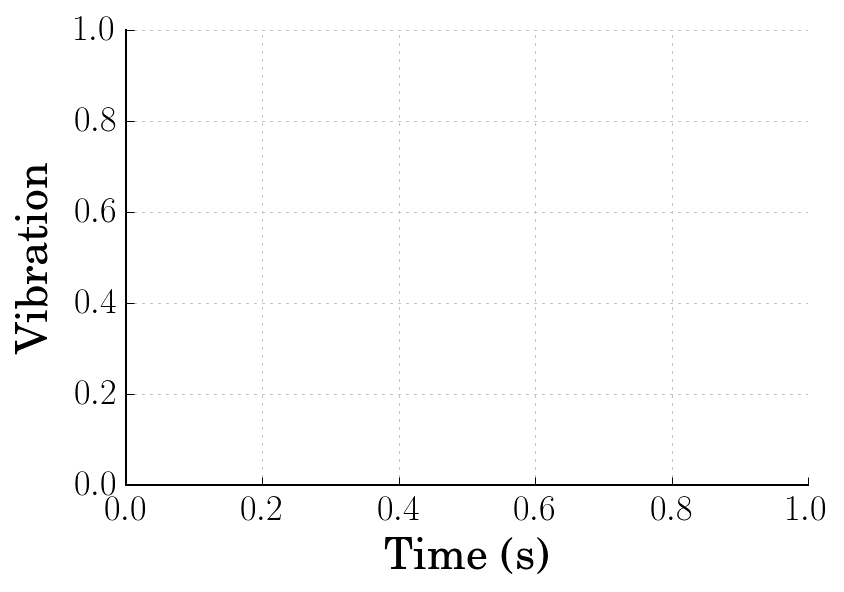

In [67]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to CMU Serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Vibration',family='serif',fontsize=22,weight='bold',labelpad=10)

plt.plot(time,vib,linewidth=2, linestyle="--", label=r'Raw')
plt.plot(time,vib_detrend[window_size-2:-1],linewidth=2, label=r'Processed')

# uncomment below and set limits if needed
# xlim(0,5)
# ylim(0,10)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext,family='serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# save the figure as a high-res pdf in the current folder
# plt.savefig('vibration_data.pdf',dpi=600)

fig.set_size_inches(9,6) # Resize the figure for better display in the notebook

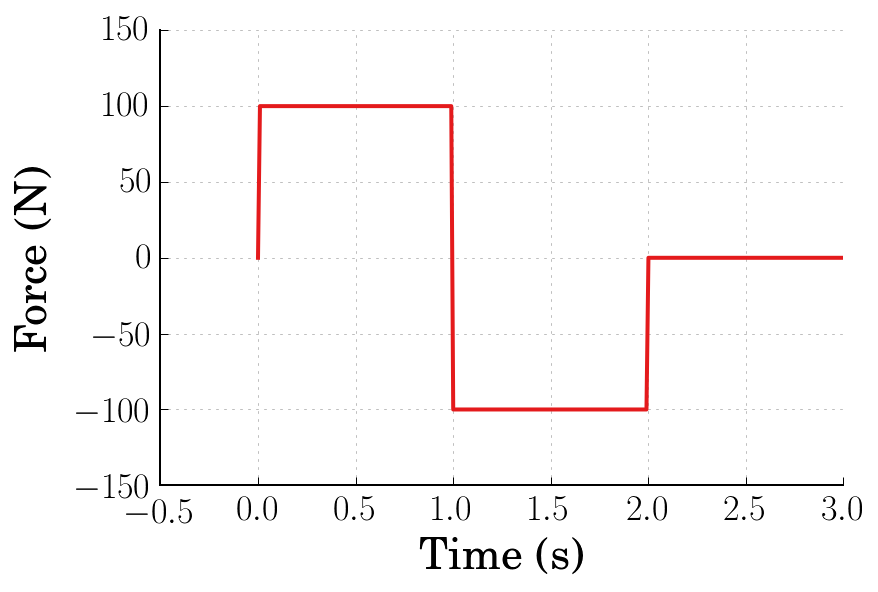

In [69]:
times = np.linspace(0,10,1000)
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to CMU Serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Force (N)',family='serif',fontsize=22,weight='bold',labelpad=10)

# plt.plot(times,bang([100*0.4886,100*0.0228,100*0.4886,
#                                          -100*0.4886,-100*0.0228,-100*0.4886],
#                                         [0,0.0059,0.0118,1,1+0.0059,1+0.0118],1,times))
# plt.plot(times,bang([100*0.3075,100*0.3851,100*0.3075,
#                                          -100*0.3075,-100*0.3851,-100*0.3075],
#                                         [0,0.0059,0.0118,1,1+0.0059,1+0.0059+0.0118],1,times))
# plt.plot(times,bang([100*0.5085,100*0.4915,-100*0.5085,-100*0.4915],[0,0.5556,1,1+0.5556],1,times))
# plt.plot(times,shaping.bang_bang(times,100,100,100))
# example_shaper = shaping.ZV(5.53,0.01084)
# Shaper = example_shaper.shaper
# shaping.shaped_input(shaping.s_curve, time, total,2, 1, 1)
# plt.plot(times, shaping.shaped_input(shaping.bang_bang, times, Shaper,100,100,100))
# plt.plot(times,bang([100*0.3075,100*0.3851,-100*0.3075,-100*0.3851],[0,0.0059,1,1+0.0059],1,times))
# ax.fill_between(times,shaping.bang_bang(times,100,100,100), color='r', alpha=0.7)
# plt.plot(times,bang([100*0.5085],[0],1,times))
# plt.plot(times,bang([100*0.4915],[0.5556],1,times))
# plt.plot(times,bang([-100*0.5085],[1],1,times))
# plt.plot(times,bang([-100*0.4915],[1+0.5556],1,times))
# ax.fill_between(times,bang([100*0.5085],[0],1,times), color='r', alpha=0.7)
# ax.fill_between(times,bang([100*0.4915],[0.5556],1,times), color='b', alpha=0.7)
# ax.fill_between(times,bang([-100*0.5085],[1],1,times), color='r', alpha=0.7)
# ax.fill_between(times,bang([-100*0.4915],[1+0.5556],1,times), color='b', alpha=0.7)
# ax.fill_between(times,bang([100*0.5085,100*0.4915,-100*0.5085,-100*0.4915],
#                            [0,0.5556,1,1+0.5556],1,times), color='purple', alpha=0.7)
# plt.plot(times,bang([100*0.5085,100*0.4915,-100*0.5085,-100*0.4915],[0,0.5556,1,1+0.5556],1,times))

# plt.plot(times, bang([100*0.507, 100*0.0002,100*0.4928,
#                                    -100*0.507,-100*0.0002,-100*0.4928],
#                                    [0,0.2708,0.5416,1,1+0.2708,1+0.5416],1,times))
# plt.plot(times, bang([100*0.3044, 100*0.3889,100*0.3068,
#                                         -100*0.3044, -100*0.3889,-100*0.3068],
#                                         [0,0.2708,0.5416,1,1+0.2708,1+0.5416],1,times))

# plt.plot(times, bang([100*0.3075, 100*0.3851,100*0.3075,
#                       -100*0.3075,-100*0.3851,-100*0.3075],[0,0.0059,0.118,1,1+0.0059,1+0.118],1,times))
# plt.plot(times, bang([100],[0],10,times))
# ax.fill_between(times,bang([100*0.3075],[0],1,times), color='r', alpha=0.7)
# ax.fill_between(times,bang([100*0.3851],[0.5556],1,times), color='b', alpha=0.7)
# ax.fill_between(times,bang([100*0.3075],[1],1,times), color='r', alpha=0.7)
# plt.plot(times, bang([100*0.3075, 100*0.3851,100*0.3075],[0,0.5556,1,1+0.5556],1,times))
# plt.plot(times,bang([5],[0], 1, times)+bang([5],[0.5], 1, times)+bang([5],[0.6], 1, times))
# plt.plot(times,bang([100*0.3075],[0], 1, times)+bang([100*0.3851],[0.0059], 1, times)+bang([100*0.3075],[0.118], 1, times))
# plt.xlim(-.1,0.5);
# plt.ylim(-15,15)
plt.plot(times, shaping.bang_bang(times,100,100,100,0))
# plt.xlabel('Time (s)')
# plt.ylabel('Force (N)')
plt.xlim(-0.5,3)
plt.ylim(-150,150)
# plt.savefig('/Users/forrest/Desktop/unshaped_cart.pdf')

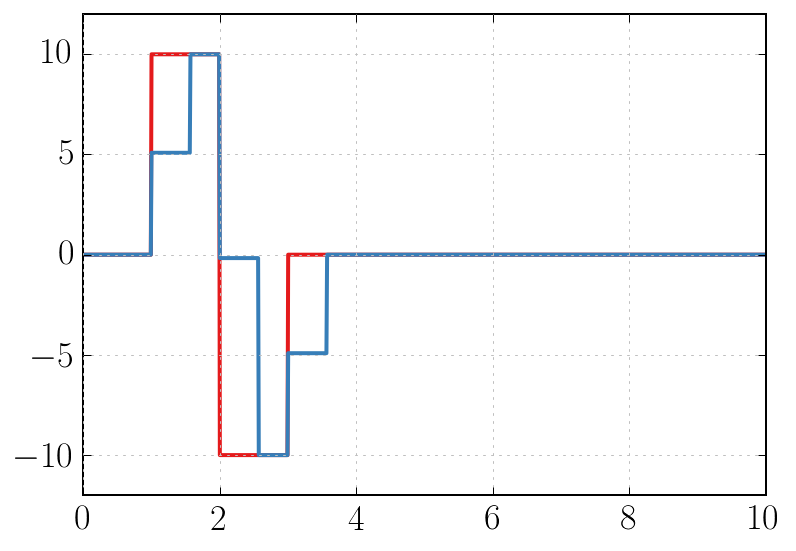

In [22]:
# plt.plot(times, bang([100*0.3075, 100*0.3851,100*0.3075],[0,0.0059,0.118,1],1,times))
plt.plot(times, shaping.bang_bang(times,10,10,10, 1))
plt.plot(times, shaping.shaped_input(shaping.bang_bang, times, Shaper,10,10,10,1))
# plt.xlim(-.1,3);
plt.ylim(-12,12)

In [70]:
# Setting up the coordinates, speeds, and creating KanesMethod
coordinates = [x, beta]
speeds = [x_dot, beta_dot]
kane = me.KanesMethod(A, coordinates, speeds, kde)

# Creating Fr and Fr_star
fr, frstar = kane.kanes_equations(loads, [Pa0, Pa1])

# Creating the PyDy System
sys = System(kane)

In [113]:
example_shaper = shaping.ZV(0.89,0.0)
Shaper = example_shaper.shaper
Shaper

array([[ 0.0000,  0.5000],
       [ 0.5618,  0.5000]])

In [103]:
# Assigning all the constants

runtime = 10

temp = 100
temp2 = 29.6

Im_1 = 0.50699
Im_2 = 0.000215
Im_3 = 0.492795

# Im_1 = 0.507 * 0.5828
# Im_2 = 0 * 0.5828
# Im_3 = 0.4928 * 0.2955029982

sys.constants = {m1: point1_mass,
                 M: cart_mass,
                 g: 9.81,
                 L1: Length1}
# Y at -0.025 for proper oscillation
sys.initial_conditions = {x:0,
#                           y:0,
                          beta:0.0,
                          x_dot:0,
#                           y_dot:0,
                          beta_dot:0}
# sys.specifieds={f:lambda d, t:bang([temp2*Im_1, temp2*Im_2,temp2*Im_3,
#                                    -temp2*Im_1,-temp2*Im_2,-temp2*Im_3],
#                                    [0,0.2708,0.5416,1,1+0.2708,1+0.5416],1,t),
#                f_cart:lambda y, t:bang([temp*0.3044, temp*0.3889,temp*0.3068,
#                                         -temp*0.3044, -temp*0.3889,-temp*0.3068],
#                                         [0,0.2708,0.5416,1,1+0.2708,1+0.5416],1,t)}

# sys.specifieds={f:lambda y, t:bang([14],[0],100,t)}

# sys.specifieds={f_cart:lambda y, t:bang([100*0.5085,100*0.4915,-100*0.5085,-100*0.4915],[0,0.5556,1,1+0.5556],1,t)}
# sys.specifieds={f_cart:lambda y, t:shaping.bang_bang(t,100,100,100)}
sys.specifieds={f_cart:lambda y, t:shaping.shaped_input(shaping.bang_bang, t, Shaper,100,100,100)}
# sys.specifieds={f:lambda y, t:shaping.shaped_input(shaping.bang_bang, t, Shaper,100,100,100)}
sys.times = np.linspace(0.0, runtime, runtime*30)
sys.generate_ode_function(generator='cython')
resps = sys.integrate()
# np.save('/Users/forrest/Desktop/temp', resp)

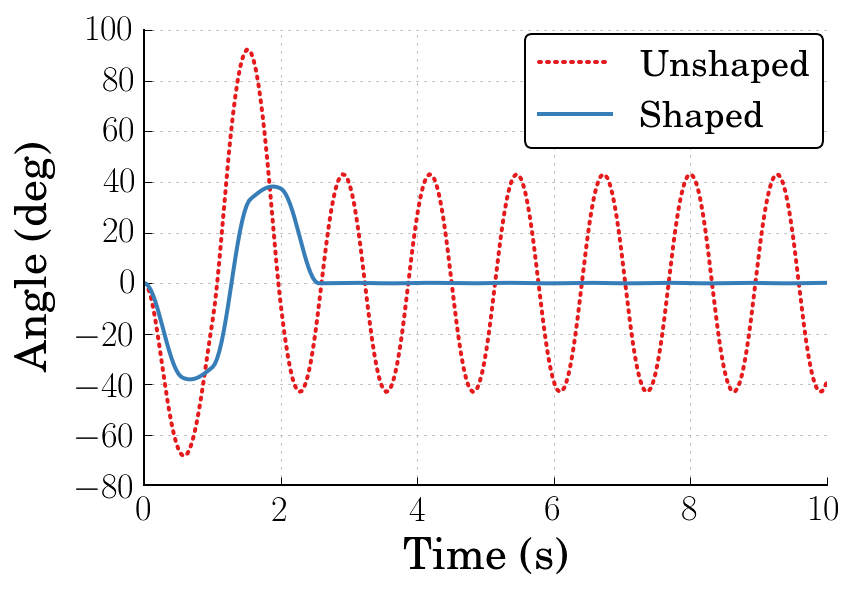

In [112]:
fig = plt.figure(figsize=(6,4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17,left=0.17,top=0.96,right=0.96)

# Change the axis units to CMU Serif
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':',color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)',family='serif',fontsize=22,weight='bold',labelpad=5)
plt.ylabel('Angle (deg)',family='serif',fontsize=22,weight='bold',labelpad=10)



# plt.plot(sys.times,np.rad2deg(original[:,1]), label='Original')
# plt.plot(sys.times,np.rad2deg(single_resp[:,1]), label='Single')
# plt.plot(sys.times,np.rad2deg(resp2[:,1]), label='Unshaped')
# plt.plot(sys.times,np.rad2deg(resp[:,1]), label='Multi')
plt.plot(sys.times,np.rad2deg(resp[:,1]), label='Unshaped', linestyle=':')
plt.plot(sys.times,np.rad2deg(resps[:,1]), label='Shaped')
# plt.plot(sys.times,single_resp[:,0], label='single')
plt.legend(loc='upper right')
# plt.xlabel('Time (s)')
# plt.ylabel('Angle (deg)')
# plt.ylim(-10,10);
plt.savefig('/Users/forrest/Desktop/shaped_response2.pdf')

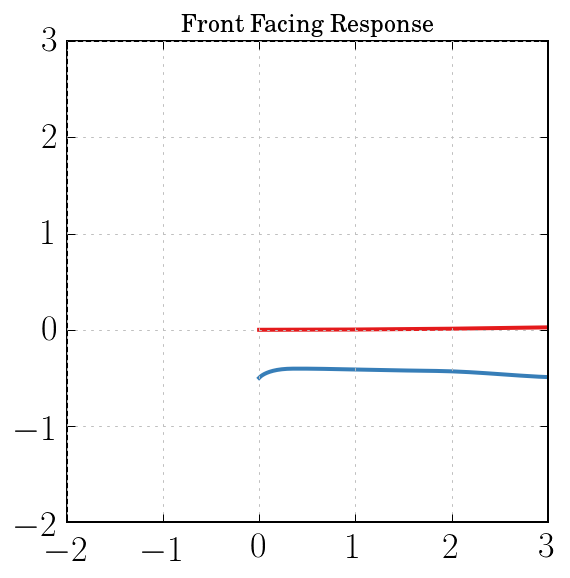

In [18]:
# mpl.rcParams['savefig.dpi'] = 72
# plt.figure(num=1, figsize=(14,4))
x_resp = resp[:,0]
# y_resp = resp[:,1]
beta_resp = resp[:,1]
ax = plt.gca()
ax.set_aspect('equal')
# plt.subplot(131)
plt.plot(x_resp)

pen1 = Length1*np.sin(beta_resp) + x_resp
pen2 = -Length1*np.cos(beta_resp)

plt.plot(pen1, pen2)
# plt.plot(pen3, pen4)
plt.xlim(-2,3)
plt.ylim(-2,3)
plt.title('Front Facing Response')

# plt.subplot(132)
# plt.plot(sys.times, resp[:,1])
# plt.title('Z Response')
# plt.gca().invert_yaxis()
# plt.subplot(133)
# plt.plot(sys.times, np.rad2deg(resp[:,2]))
# plt.title(r'$\beta$ Response')

In [105]:
constants = {m1: point1_mass,
             M: cart_mass,
             g: 9.81,
             L1: Length1}
op_point = {x:0,
            x_dot:0,  
            beta:0.0, 
            beta_dot:0}

In [111]:
Length1

In [106]:
linearizer = kane.to_linearizer()
Maz, A_matrix, B_matrix = linearizer.linearize()
M_op = me.msubs(Maz, op_point)
A_op = me.msubs(A_matrix, op_point)
B_op = me.msubs(B_matrix, op_point)

In [107]:
perm_mat = linearizer.perm_mat
A_lin = perm_mat.T * M_op.LUsolve(A_op)
B_lin = perm_mat.T * M_op.LUsolve(B_op)

A_lin_constants = me.msubs(A_lin, constants)
B_lin_constants = me.msubs(B_lin, constants)
A_sol = A_lin_constants.subs(op_point).doit()
B_sol = B_lin_constants.subs(op_point).doit()

A_np = np.array(np.array(A_sol), np.float)
B_np = np.array(np.array(B_sol), np.float)

eigenvals, eigenvects = np.linalg.eig(A_np)

In [108]:
eigen = eigenvals[0:3:2]
eigen_abs = np.abs(eigen)
damp = np.abs(np.real(eigen)/eigen_abs)

In [110]:
eigenvals

array([ 0.+0.j       ,  0.+0.j       ,  0.+5.4249424j,  0.-5.4249424j])

## Multi-Input Shaping

In [ ]:
s_0 = np.complex(0, 0)
s_1 = np.complex(0.0,0.0)
s_2 = np.complex(-0.06, 5.53411239)
s_3 = np.complex(0, 196.11613514)
s_0_star = np.conjugate(s_0)
s_1_star = np.conjugate(s_1)
s_2_star = np.conjugate(s_2)
s_3_star = np.conjugate(s_3)

g_0_0 = -0.2
g_0_1 = 0
g_0_2 = 1.2
# g_0_3 = -0.5

g_1_0 = 0.1
g_1_1 = 0
g_1_2 = -0.2
# g_1_3 = 0

In [ ]:
n_amount = int(2)
m_amount = int(1)
l = int(np.ceil((2*n_amount) / (m_amount + 1)))
a_full = np.array([0,0,0,0,0,0])
for i in range(10000):
    steps = np.linspace(0,1,10000)
    T = steps[i]
    P = np.array([[g_0_1, g_0_1*np.exp(-s_1*T), g_0_1*np.exp(-s_1*l*T),
             g_1_1, g_1_1*np.exp(-s_1*T), g_1_1*np.exp(-s_1*l*T)],
            [g_0_1, g_0_1*np.exp(-s_1_star*T), g_0_1*np.exp(-s_1_star*l*T),
             g_1_1, g_1_1*np.exp(-s_1_star*T), g_1_1*np.exp(-s_1_star*l*T)],
           [g_0_2, g_0_2*np.exp(-s_2*T), g_0_2*np.exp(-s_2*l*T),
             g_1_2, g_1_2*np.exp(-s_2*T), g_1_2*np.exp(-s_2*l*T)],
            [g_0_2, g_0_2*np.exp(-s_2_star*T), g_0_2*np.exp(-s_2_star*l*T),
             g_1_2, g_1_2*np.exp(-s_2_star*T), g_1_2*np.exp(-s_2_star*l*T)],
           [1,1,1,0,0,0],[0,0,0,1,1,1]])
    P_inv = np.linalg.pinv(P)
    w = np.array([[0],[0],[0],[0],[1],[1]])
    a = np.dot(P_inv,w)
    a_row = np.real(a.reshape(1,6))
    a_full = np.vstack((a_full, a_row))
a_full = np.delete(a_full,0,0)
index=np.array([0])
for i in range(6):
    # the ten is because sometimes the impulses start at zero
    index = np.vstack((index,np.where(a_full[:,i][10:] > 0)[0][0]))
index = np.delete(index, (0), axis=0)
index_arg = np.argmax(index)

time2 = round(steps[10:][index[index_arg][0]],6)
time3 = round(time2 * 2,4)
impulse1_1 = round(a_full[:,0][10:][index[index_arg][0]],6)
impulse1_2 = round(a_full[:,1][10:][index[index_arg][0]],6)
impulse2_1 = round(a_full[:,2][10:][index[index_arg][0]],6)
impulse2_2 = round(a_full[:,3][10:][index[index_arg][0]],6)
impulse3_1 = round(a_full[:,4][10:][index[index_arg][0]],6)
impulse3_2 = round(a_full[:,5][10:][index[index_arg][0]],6)

# print('Time    Amp1    Amp2\n0       {}\n{}'.format(impulse1_1,time2))
# plt.plot(steps,a_full[:,0])
# plt.plot(steps,a_full[:,1])
# plt.plot(steps,a_full[:,2])
# plt.plot(steps,a_full[:,3])
# plt.plot(steps,a_full[:,4])
# plt.plot(steps,a_full[:,5])
# plt.ylim(-10,10)
# plt.xlim(0.0,0.25);
df = pd.DataFrame({"Input 1":[impulse1_1,impulse1_2, impulse2_1], 
                   "Input 2":[impulse2_2,impulse3_1, impulse3_2],
                   "Times":[0,time2,time3]})
itable.PrettyTable(df)

## Cooperative multi-input shaping

In [11]:
s_1 = np.complex(-0.1, 9.9995)
s_2 = np.complex(-0.051, 16.999)
s_1_star = np.conjugate(s_1)
s_2_star = np.conjugate(s_2)

g_0_0 = 1
g_0_1 = 0
g_0_2 = 0.5

g_1_0 = 0.5
g_1_1 = 0
g_1_2 = 1

In [12]:
U_1 = 10/s_1 + (10*np.exp(-2*s_1) )/ s_1 - (20*np.exp(-4*s_1) )/ s_1
U_1_star = 10/s_1_star + (10*np.exp(-2*s_1_star) )/ s_1_star - (20*np.exp(-4*s_1_star) )/ s_1_star

U_2 = 20/s_2 - (17*np.exp(-2*s_2) )/ s_2 - (3*np.exp(-4*s_2) )/ s_2
U_2_star = 20/s_2_star - (17*np.exp(-2*s_2_star) )/ s_2_star - (3*np.exp(-4*s_2_star) )/ s_2_star

In [13]:
# Cooperative multi-input shaping
n_amount = int(2)
m_amount = int(1)
l = int(np.ceil((2*n_amount) / (m_amount + 1)))
a_full = np.array([0,0,0,0,0,0])
for i in range(10000):
    steps = np.linspace(0,1,10000)
    T = steps[i]
    P = np.array([[g_0_1*U_1, g_0_1*U_1*np.exp(-s_1*T), g_0_1*U_1*np.exp(-s_1*l*T),
             g_1_1*U_1, g_1_1*U_1*np.exp(-s_1*T), g_1_1*U_1*np.exp(-s_1*l*T)],
            [g_0_1*U_1_star, g_0_1*U_1_star*np.exp(-s_1_star*T), g_0_1*U_1_star*np.exp(-s_1_star*l*T),
             g_1_1*U_1_star, g_1_1*U_1_star*np.exp(-s_1_star*T), g_1_1*U_1_star*np.exp(-s_1_star*l*T)],
           [g_0_2*U_2, g_0_2*U_2*np.exp(-s_2*T), g_0_2*U_2*np.exp(-s_2*l*T),
             g_1_2*U_2, g_1_2*U_2*np.exp(-s_2*T), g_1_2*U_2*np.exp(-s_2*l*T)],
            [g_0_2*U_2_star, g_0_2*U_2_star*np.exp(-s_2_star*T), g_0_2*U_2_star*np.exp(-s_2_star*l*T),
             g_1_2*U_2_star, g_1_2*U_2_star*np.exp(-s_2_star*T), g_1_2*U_2_star*np.exp(-s_2_star*l*T)],
           [1,1,1,0,0,0],[0,0,0,1,1,1]])
    P_inv = np.linalg.pinv(P)
    w = np.array([[0],[0],[0],[0],[1],[1]])
    a = np.dot(P_inv,w)
    a_row = np.real(a.reshape(1,6))
    a_full = np.vstack((a_full, a_row))
a_full = np.delete(a_full,0,0)
index=np.array([0])
for i in range(6):
    # the ten is because sometimes the impulses start at zero
    index = np.vstack((index,np.where(a_full[:,i][10:] > 0)[0][0]))
index = np.delete(index, (0), axis=0)
index_arg = np.argmax(index)

time2 = round(steps[10:][index[index_arg][0]],6)
time3 = round(time2 * 2,4)
impulse1_1 = round(a_full[:,0][10:][index[index_arg][0]],6)
impulse1_2 = round(a_full[:,1][10:][index[index_arg][0]],6)
impulse2_1 = round(a_full[:,2][10:][index[index_arg][0]],6)
impulse2_2 = round(a_full[:,3][10:][index[index_arg][0]],6)
impulse3_1 = round(a_full[:,4][10:][index[index_arg][0]],6)
impulse3_2 = round(a_full[:,5][10:][index[index_arg][0]],6)

# print('Time    Amp1    Amp2\n0       {}\n{}'.format(impulse1_1,time2))
# plt.plot(steps,a_full[:,0])
# plt.plot(steps,a_full[:,1])
# plt.plot(steps,a_full[:,2])
# plt.plot(steps,a_full[:,3])
# plt.plot(steps,a_full[:,4])
# plt.plot(steps,a_full[:,5])
# plt.ylim(-10,10)
# plt.xlim(0.0,0.25);
df = pd.DataFrame({"Input 1":[impulse1_1,impulse1_2, impulse2_1], 
                   "Input 2":[impulse2_2,impulse3_1, impulse3_2],
                   "Times":[0,time2,time3]})
itable.PrettyTable(df)

Input 1,Input 2,Times
0.417861,0.502389,0.0
0.167047,0.000761,0.09591
0.415091,0.49685,0.1918


In [ ]:
a_full[:,1][312]

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(steps,a_full[:,0])
plt.plot(steps,a_full[:,1])
plt.plot(steps,a_full[:,2])
plt.plot(steps,a_full[:,3])
plt.plot(steps,a_full[:,4])
plt.plot(steps,a_full[:,5])
# ax.annotate('local max', xy=(0.1, 1), xytext=(0.2, 1),
#             arrowprops=dict(facecolor='black', shrink=0.1),
#             )
plt.ylim(-5,5)
# plt.legend()
plt.xlim(0,0.2);
plt.show()

In [ ]:
df = pd.DataFrame({"Input 1":[impulse1_1,impulse1_2, impulse2_1,impulse2_2], 
                   "Input 2":[impulse3_1, impulse3_2,impulse4_1,impulse4_2],
                   "Times":[0,time2,time3,time4]})
itable.PrettyTable(df)

In [ ]:
# What frame per second?
fps = 30

x_resp = resp[:,0]
# y_resp = resp[:,1]
beta_resp = resp[:,1]

# For the cables and top of rectangle
pen1_x =Length1*np.sin(beta_resp) + x_resp
pen1_y = -Length1*np.cos(beta_resp)

# pen2_x = (Length1*np.sin(beta_resp) + Length2*np.sin(theta_resp) + x_resp)
# pen2_y = (-Length1*np.cos(beta_resp) - Length2*np.cos(theta_resp) + y_resp)

# pen3_x = (Length1*np.sin(beta_resp) + Length2*np.sin(theta_resp) + Length3*np.sin(gamma_resp) + x_resp)
# pen3_y = (-Length1*np.cos(beta_resp) - Length2*np.cos(theta_resp) - Length3*np.cos(gamma_resp) + y_resp)

import matplotlib.animation as animation
import matplotlib.pyplot as plt
# Change some plot properties to make the video work and look better
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
mpl.rcParams['savefig.dpi'] = 160
mpl.rcParams['savefig.bbox'] = 'standard'
fig = plt.figure(figsize=(8,4.5))
ax = fig.add_subplot(111, aspect='equal')
plt.ylim(-1,0.5)
# plt.xlim(-x_resp[0]-1, x_resp[0]+1.2)
plt.xlim(x_resp[0]-2.0, x_resp[-1]+0.2+2.0)
plt.xlabel('Horizontal Motion', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Vertical Motion', fontsize=22, weight='bold', labelpad=10)
# plt.axes().set_aspect('equal')

# leftcable, = plt.plot([],[], linewidth=0.5, linestyle = '-',
#                       label='leftcable', color='b')
# rightcable, = plt.plot([],[], linewidth=0.5, linestyle = '-',
#                        label='rightcable', color='b')
# barLine, = plt.plot([],[], linewidth=2, linestyle = '-', label='Bar')
patch = patches.Rectangle((0, 0), 0, 0, angle=0)
first_rod, = plt.plot([],[], linewidth=1, linestyle = '-',
                      label='leftcable', color='b')
# second_rod, = plt.plot([],[], linewidth=1, linestyle = '-',
#                       label='leftcable', color='b')
# third_rod, = plt.plot([],[], linewidth=1, linestyle = '-',
#                       label='leftcable', color='b')
dotP1, = plt.plot([],[], 'ro', label='Center of Gravity')
# dotP2, = plt.plot([],[], 'ro', label='Center of Gravity')
# dotP3, = plt.plot([],[], 'ro', label='Center of Gravity')
# rod,    = plt.plot([],[], linewidth=6, linestyle = '-', label='rod',
#                    color='r')

def init():
    """ Initialize the lines in the plot """
    first_rod.set_data([], [])
#     second_rod.set_data([], [])
#     third_rod.set_data([], [])
    dotP1.set_data([],[])
#     dotP2.set_data([],[])
#     dotP3.set_data([],[])
    ax.add_patch(patch)
#     rod.set_data([],[])

    return first_rod, dotP1, patch,

def animate_un(i):
    """ Update the plot for frame i """
    if not (i % 30): # print notice every 30th frame
        print('Processing frame {}'.format(i))

    first_rod.set_data([x_resp[i], pen1_x[i]], [0, pen1_y[i]])
#     second_rod.set_data([pen1_x[i], pen2_x[i]], [pen1_y[i], pen2_y[i]])
#     third_rod.set_data([pen2_x[i], pen3_x[i]], [pen2_y[i], pen3_y[i]])
    dotP1.set_data([[pen1_x[i]],[pen1_y[i]]])
#     dotP2.set_data([[pen2_x[i]],[pen2_y[i]]])
#     dotP3.set_data([[pen3_x[i]],[pen3_y[i]]])
    patch.set_width(0.2)
    patch.set_height(0.1)
    patch.set_xy([x_resp[i]-0.1, 0-0.05])
    patch._angle = np.rad2deg(0)
#     plt.xlim(x_resp[i]-2.0, x_resp[i]+0.2+2.0)

    return first_rod, dotP1, patch,

ani_un = animation.FuncAnimation(fig, animate_un, interval = fps,
        frames = runtime*fps, blit = True, init_func = init)

ani_un.save('/Users/forrest/Desktop/{}.mp4'.format('cart_pen'), bitrate = 2500, fps = fps)